# Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

### Problem Statement

The main goal of the case study is to build ML models to predict churn. The predictive model should fulfil the following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.


## Business Objectives

1. Data Preprocessing
2. Exploratory Data Analysis
3. The given problem is exactly about predicting the probability of churning of customer, which is a probability, thus it falls into the Classification Category
4. To understand which variables are effecting the customer to churn
5. Model to be a good way for management to understand the whether the existing customer is going to be churned or not
6. Recommend strategies to manage customer churn based on your observations

## Data Description

- `CIRCLE_ID` : Telecom circle area to which the customer belongs to
- `LOC` : Local calls - within same telecom circle
- `STD` : STD calls - outside the calling circle
- `IC` : Incoming calls
- `OG` : Outgoing calls
- `T2T` : Operator T to T, i.e. within same operator (mobile to mobile)
- `T2M` : Operator T to other operator mobile
- `T2O` : Operator T to other operator fixed line
- `T2F` : Operator T to fixed lines of T
- `T2C` : Operator T to it’s own call center
- `ARPU` : Average revenue per user
- `MOU` : Minutes of usage - voice calls
- `AON` : Age on network - number of days the customer is using the operator T network
- `ONNET` : All kind of calls within the same operator network
- `OFFNET` : All kind of calls outside the operator T network
- `ROAM` : Indicates that customer is in roaming zone during the call
- `SPL` : Special calls
- `ISD` : ISD calls
- `RECH` : Recharge
- `NUM` : Number
- `AMT` : Amount in local currency
- `MAX` : Maximum
- `DATA` : Mobile internet
- `3G` : 3G network
- `AV` : Average
- `VOL` : Mobile internet usage volume (in MB)
- `2G` : 2G network
- `PCK` : Prepaid service schemes called - PACKS
- `NIGHT` : Scheme to use during specific night hours only
- `MONTHLY` : Service schemes with validity equivalent to a month
- `SACHET` : Service schemes with validity smaller than a month
- `*.6` : KPI for the month of June
- `*.7` : KPI for the month of July
- `*.8` : KPI for the month of August
- `FB_USER` : Service scheme to avail services of Facebook and similar social networking sites
- `VBC` : Volume based cost - when no specific scheme is not purchased and paid as per usage
- `churn_probability` : Probability of churn

According to our case study we can say that,

**Target Variable:** `churn_probability`

## Step 1 - Exploratory Data Analysis

**Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import RFE

import statsmodels.api as sm

import warnings  
warnings.filterwarnings('ignore') # to ignore the warnings

pd.set_option("display.max_columns",None) # to display all columns 
pd.set_option("display.max_rows",None) # to display all rows

In [2]:
# importing the data(train and test)
train = pd.read_csv(r"train.csv",index_col=0)
test = pd.read_csv(r"test (1).csv",index_col=0)

In [3]:
# having looking at training data
train.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
id                                                              
0         109             0.0             0.0             0.0   
1         109             0.0             0.0             0.0   
2         109             0.0             0.0             0.0   
3         109             0.0             0.0             0.0   
4         109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
id                                                                           
0             6/30/2014            7/31/2014            8/31/2014   31.277   
1             6/30/2014            7/31/2014            8/31/2014    0.000   
2             6/30/2014            7/31/2014            8/31/2014   60.806   
3             6/30/2014            7/31/2014            8/31/2014  156.362   
4             6/30/2014            7/31/2014            8/31/2014  240.708   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
id                                                                          
0    87.009    7.527        48.58       124.38         1.29         32.24   
1   122.787   42.953         0.00         0.00         0.00          0.00   
2   103.176    0.000         0.53        15.93         0.00         53.99   
3   205.260  111.095         7.26        16.01         0.00         68.76   
4   128.191  101.565        21.28         4.83         6.13         56.99   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
id                                                                            
0          96.68          2.33           0.00            0.0            0.0   
1          25.99         30.89           0.00            0.0            0.0   
2          82.05          0.00           0.00            0.0            0.0   
3          78.48         50.23           0.00            0.0            0.0   
4          38.11          9.63          53.64            0.0            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
id                                                                  
0            0.00            0.0           0.00              2.23   
1            0.00            0.0           0.00              0.00   
2            0.00            0.0           0.00              0.53   
3            0.00            0.0           1.63              6.99   
4           15.73            0.0           0.00             10.16   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
id                                                                           
0               0.00              0.28              5.29             16.04   
1               0.00              0.00              0.00              0.00   
2              12.98              0.00             24.11              0.00   
3               3.94              0.00             37.91             44.89   
4               4.83              6.13             36.74             19.88   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
id                                                                           
0               2.33              0.00              0.00              0.00   
1               0.00              0.00              0.00              0.00   
2               0.00              0.00              0.00              0.00   
3              23.63              0.00              0.00              0.00   
4               4.61             11.99              1.23              5.01   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
id                                                                       
0               0.00              0.00              0.00          7.53   
1               0.00             22.01             29.79          0.00   
2               2.14             

In [4]:
# shape of training data
print(train.shape)

(69999, 171)


The training data consists of **69999** records and **171** columns

In [5]:
# dropping duplicate values from training if any
train.drop_duplicates(inplace = True)
print(train.shape)

(69999, 171)


We can see that there are no duplicates in our dateset.

In [6]:
# having looking at testing data
test.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
id                                                                 
69999        109             0.0             0.0             0.0   
70000        109             0.0             0.0             0.0   
70001        109             0.0             0.0             0.0   
70002        109             0.0             0.0             0.0   
70003        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
id                                                                              
69999            6/30/2014            7/31/2014            8/31/2014   91.882   
70000            6/30/2014            7/31/2014            8/31/2014  414.168   
70001            6/30/2014            7/31/2014            8/31/2014  329.844   
70002            6/30/2014            7/31/2014            8/31/2014   43.550   
70003            6/30/2014            7/31/2014            8/31/2014  306.854   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
id                                                                             
69999   65.330   64.445        31.78        20.23        23.11         60.16   
70000  515.568  360.868        75.51        41.21        19.84        474.34   
70001  434.884  746.239         7.54         7.86         8.40         16.98   
70002  171.390   24.400         5.31         2.16         0.00         40.04   
70003  406.289  413.329       450.93       609.03       700.68         60.94   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                
69999         32.16         34.83           0.00           0.00   
70000        621.84        394.94           0.00           0.00   
70001         45.81         45.04          22.81         103.38   
70002        205.01         24.01           0.00           0.00   
70003         23.84         74.16           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                                  
69999           0.00           0.00           0.00           0.00   
70000           0.00           0.00           0.00           0.00   
70001          26.08          24.53          53.68          54.44   
70002           0.00           0.00           0.00           0.00   
70003           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                              
69999             24.88             20.23             21.06             18.13   
70000             75.51             41.21             19.84            473.61   
70001              0.00              0.00              0.00              0.00   
70002              5.31              0.00              0.00              2.94   
70003              0.45              0.78             14.56              2.39   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                              
69999             10.89              8.36              0.00             13.58   
70000            598.08            377.26              0.73              0.00   
70001              0.00              0.00              0.00              0.00   
70002             98.61             20.51              0.00              0.00   
70003              2.66             10.94              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                              
69999              0.00               0.0              0.00              0.03   
70000              0.00               0.0              0.00         

In [7]:
# shape of testing data
print(test.shape)

(30000, 170)


The testing data consists of **30000** records and **170** columns

**Performing Data preparation for training and testing to increase the time efficiency.**

In [8]:
# Deleting insignificant data from training data
# removing 4 columns as it has same values for all the rows
train.drop(['circle_id','loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace = True)

# removing 3 columns, it represents the last day of the month which not useful and same values for all rows
train.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'],axis=1,inplace = True)

In [9]:
# Deleting insignificant data from testing data
# we have to repeat all the pre processing step for testing data as well.
test.drop(['circle_id','loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace = True)
test.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'],axis=1,inplace = True)

In [10]:
# Checking the null values in the train data
train.isnull().sum()

arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou_6             2768
loc_og_t2f_mou_7             2687
loc_og_t2f_mou_8             3703
loc_og_t2c_mou_6             2768
loc_og_t2c_mou_7             2687
loc_og_t2c_mou_8             3703
loc_og_mou_6                 2768
loc_og_mou_7                 2687
loc_og_mou_8  

By looking at sum of missing data, we can say that there are null values because the customer would have not recharged or no outgoing or incoming data will be available for them.

We can impute the missing value with 0 as missing value means there was no such transaction done by them.

In [11]:
# missing value columns
col_list = [i for i in list(train.columns) if ('date' not in i) and (i != 'churn_probability')]
print(col_list)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'lo

In [12]:
print(len(col_list))

157


In [13]:
# Imputing the missing value
train[col_list] = train[col_list].fillna(0)
test[col_list] = test[col_list].fillna(0)
print('Imputation of missing value in train and test data is completed')

Imputation of missing value in train and test data is completed


In [14]:
# Checking the null values 
train.isnull().sum()

arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                     0
onnet_mou_7                     0
onnet_mou_8                     0
offnet_mou_6                    0
offnet_mou_7                    0
offnet_mou_8                    0
roam_ic_mou_6                   0
roam_ic_mou_7                   0
roam_ic_mou_8                   0
roam_og_mou_6                   0
roam_og_mou_7                   0
roam_og_mou_8                   0
loc_og_t2t_mou_6                0
loc_og_t2t_mou_7                0
loc_og_t2t_mou_8                0
loc_og_t2m_mou_6                0
loc_og_t2m_mou_7                0
loc_og_t2m_mou_8                0
loc_og_t2f_mou_6                0
loc_og_t2f_mou_7                0
loc_og_t2f_mou_8                0
loc_og_t2c_mou_6                0
loc_og_t2c_mou_7                0
loc_og_t2c_mou_8                0
loc_og_mou_6                    0
loc_og_mou_7                    0
loc_og_mou_8  

We can impute the null values of date columns with **not recharged** as it is missing because no recharge was done for that month.

In [15]:
null_col = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8']
train[null_col] = train[null_col].fillna('Not Recharged')


In [16]:
# Checking the null values 
train.isnull().sum()

arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c_mou_7            0
loc_og_t2c_mou_8            0
loc_og_mou_6                0
loc_og_mou_7                0
loc_og_mou_8                0
std_og_t2t_mou_6            0
std_og_t2t_mou_7            0
std_og_t2t_mou_8            0
std_og_t2m

We can observe that there no missing value present in the data.

In [17]:
# checking the data types of all the features
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 164 entries, arpu_6 to churn_probability
dtypes: float64(132), int64(26), object(6)
memory usage: 88.1+ MB


**Checking for outliers**

In [18]:
# checking for outliers in data
train.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    127.887939    128.754731   
std      334.213918    344.366927    351.924315    295.115497    306.326345   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      5.430000      4.910000   
50%      197.484000    191.588000    192.234000     30.830000     29.160000   
75%      370.791000    365.369500    369.909000    113.100000    108.940000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     125.943607    191.010582    189.585401    186.146273       9.379276   
std      304.990552    312.900706    318.492632    318.453812      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.110000     28.790000     26.690000     23.780000       0.000000   
50%       27.840000     89.810000     85.590000     83.010000       0.000000   
75%      106.280000    223.540000    218.350000    216.410000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        6.745305       6.634328      13.625476       9.464386   
std        54.892940      51.999899      72.055036      57.409013   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   69999.000000      69999.000000      69999.000000      69999.000000   
mean        9.254848         45.050076         44.394344         43.269280   
std        62.923987        148.238746        151.998993        149.944829   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.010000          1.010000          0.760000   
50%         0.000000         10.660000         10.430000         10.060000   
75%         0.000000         38.680000         37.780000         37.260000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          89.551272         87.313796         86.301054          3.595161   
std          159.846546        151.875981        150.286404         13.073900   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.290000          7.530000          6.440000          0.000000   
50%           37.680000         37.010000         35.940000          0.000000   
75%          105.685000        103.330000        103.110000          1.860000   
max         4696.830000       4557.140000       4961.330000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           3.632045          3.467948          1.081499          1.308807   
std           13.324919         12.686917          5.631416          7.765132   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

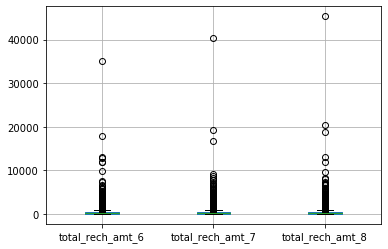

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
count      69999.000000      69999.000000      69999.000000
mean         328.139788        322.376363        323.846355
std          404.211068        411.070120        426.181405
min            0.000000          0.000000          0.000000
0%             0.000000          0.000000          0.000000
25%          110.000000        100.000000         90.000000
50%          229.000000        220.000000        225.000000
75%          438.000000        430.000000        436.000000
80%          504.000000        500.000000        504.000000
85%          594.000000        590.000000        596.000000
90%          735.000000        730.000000        734.000000
95%          998.000000        986.100000        988.000000
99%         1683.020000       1712.000000       1706.020000
100%       35190.000000      40335.000000      45320.000000
max        35190.000000      40335.000000      45320.000000


In [19]:
train[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].boxplot()
plt.show()

print(train[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].describe([0,0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99,1]))

As we can see that 99% of  total recharge done for month 6, 7, 8 are less than 1684, 1712, 1706 respectively, so we can keep 99% of data and remove rest of the data.

In [20]:
train = train[train['total_rech_amt_6']<=1684] 
train = train[train['total_rech_amt_7']<=1712]
train = train[train['total_rech_amt_8']<=1707]
print(train.shape)

(68591, 164)


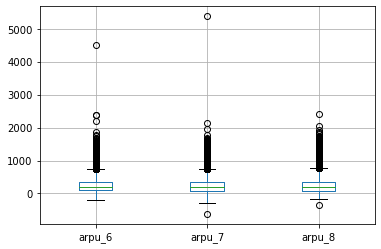

             arpu_6        arpu_7        arpu_8
count  68591.000000  68591.000000  68591.000000
mean     260.783135    254.348448    255.302986
std      239.121493    236.866648    240.979923
min     -209.465000   -622.509000   -345.129000
0%      -209.465000   -622.509000   -345.129000
25%       91.979000     85.196000     82.774000
50%      193.221000    187.080000    187.901000
75%      357.392000    352.022500    356.816500
80%      412.926000    404.955000    411.771000
85%      483.281000    473.684000    480.281000
90%      579.450000    574.667000    577.037000
95%      752.091000    742.426000    743.477000
99%     1104.080300   1082.538400   1108.902500
100%    4497.680000   5377.054000   2411.850000
max     4497.680000   5377.054000   2411.850000


In [21]:
train[['arpu_6','arpu_7','arpu_8']].boxplot()
plt.show()

print(train[['arpu_6','arpu_7','arpu_8']].describe([0,0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99,1]))

As we can see that 99% of  average revenue per user for month 6, 7, 8 are less than 1104, 1082, 1108 respectively, so we can keep 99% of data and remove rest of the data.

In [22]:
train = train[train['arpu_6']<=1104]
train = train[train['arpu_7']<=1082]
train = train[train['arpu_8']<=1108]
print(train.shape)

(66949, 164)


After treating outliers, let's do some EDA on train data to get better understanding.

0    0.8984
1    0.1016
Name: churn_probability, dtype: float64


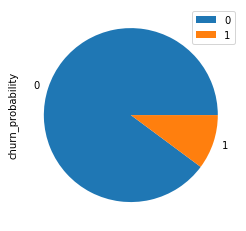

In [23]:
print(train['churn_probability'].value_counts()/len(train))
train['churn_probability'].value_counts().plot(kind = 'pie',legend = True)
plt.show()

We can see that approximately 89.9% of train data are of non-churn data and 10.1% of train data are of churn data.

#### According to average revenue

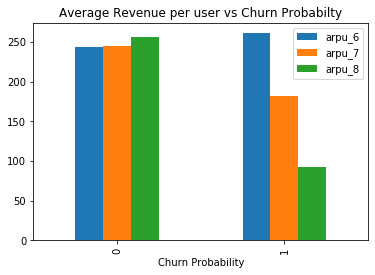

In [24]:
train1 = train.groupby(by = 'churn_probability')['arpu_6','arpu_7','arpu_8'].mean()
train1.plot(kind = 'bar')
plt.xlabel('Churn Probability')
plt.title('Average Revenue per user vs Churn Probabilty')
plt.show()

As per above graph we can see that if average revenues increase than the chances of customer not churning increases. In otherwords, we can say that if the average revenues decreases, it increases the chance of customer to churn.

#### According to age on network

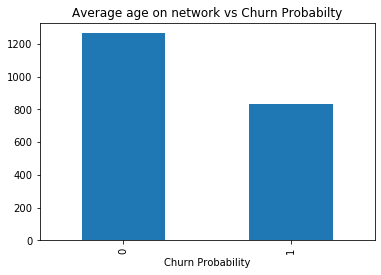

In [25]:
train1 = train.groupby(by = 'churn_probability')['aon'].mean()
train1.plot(kind = 'bar')
plt.xlabel('Churn Probability')
plt.title('Average age on network vs Churn Probabilty')
plt.show()

We can say that longer the customer uses the network, lesser the probability of customer churning.

#### According to Total Recharge Amount

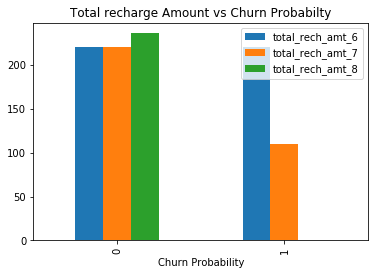

In [26]:
train1 = train.groupby(by = 'churn_probability')['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].median()
train1.plot(kind = 'bar')
plt.xlabel('Churn Probability')
plt.title('Total recharge Amount vs Churn Probabilty')
plt.show()

As per above graph we can see that if total recharge amount increases than the chances of customer not churning increases. In otherwords, we can say that if the total recharge amount decreases, it increases the chance of customer to churn.

#### According to Incoming and Outgoing call

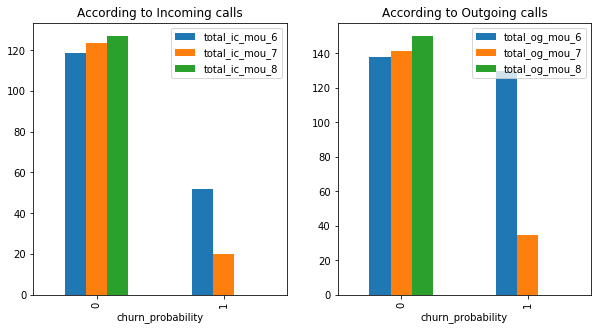

In [27]:
train1 = train.groupby(by = 'churn_probability')['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].median()
train2 = train.groupby(by = 'churn_probability')['total_og_mou_6','total_og_mou_7','total_og_mou_8'].median()

figure, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
train1.plot(kind = 'bar',ax = ax1)
train2.plot(kind = 'bar',ax = ax2)
ax1.set_title("According to Incoming calls")
ax2.set_title("According to Outgoing calls")
plt.show()


From graph, We can see that for non churn customer, the incoming and outgoing call are increasing whereas in churn customer we can see the pattern that if the incoming and outgoing call are decreasing then the chance of churning is high.

If a customer is reducing the use of network to call then we have to push them to use it with some perks so that they don't churn.

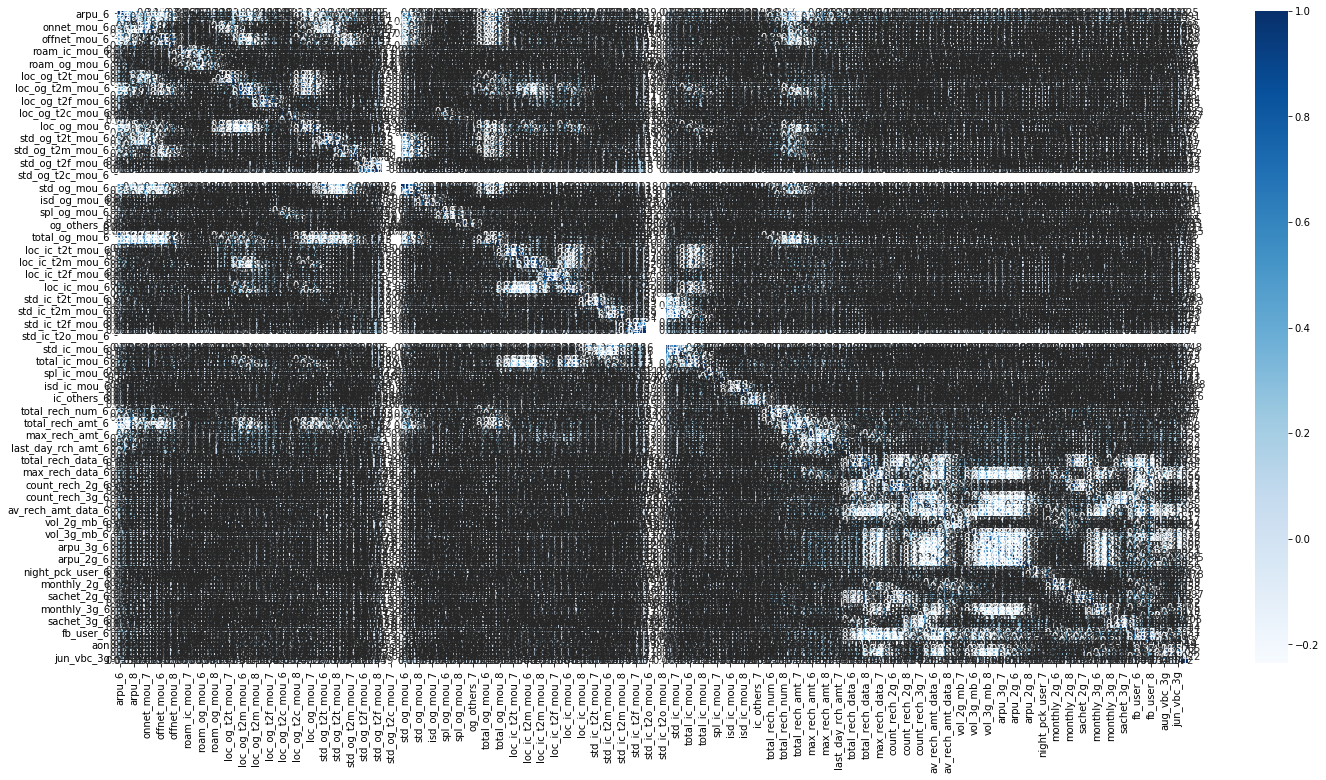

In [28]:
# Checking for correlation
plt.figure(figsize = (24,12))
sns.heatmap(train.corr(),annot = True,cmap = 'Blues')
plt.show()

As it is very difficult to understand the whether or not there are multicollinearity, it is better to use PCA or Decision tree Classifier as it overcomes the multicollinearity without treating it.


Firstly we will build simple model first and then try with PCA and then try to model the data.

**Pre-processing before building the model**

In [29]:
train.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],axis = 1,inplace = True)
test.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],axis = 1, inplace = True)

In [30]:
# we don't have to split the data as it has been splited already
y_train = train.pop('churn_probability')
X_train = train.copy()

print("Shape of X_train is ", X_train.shape)
print("Shape of y_train is ", y_train.shape)


Shape of X_train is  (66949, 157)
Shape of y_train is  (66949,)


In [31]:
X_test = test.copy()
print("Shape of X_train is ", X_test.shape)

Shape of X_train is  (30000, 157)


### Logistic Regression 

#### Without PCA

To get driving metrics from the data

In [32]:
# Before start modelling we have to scale the data so that all the columns are given equal importance
col = list(X_train.columns)
scaler = StandardScaler()
X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])

In [33]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train,y_train)

rfe = RFE(logreg,n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

col=X_train.columns[rfe.support_]
print(col)

Index(['loc_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'fb_user_8'],
      dtype='object')


In [34]:
# building GLM model
X_train_rfe=X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)

# Logistic regression model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_lm = logm1.fit()

#Print the summary 
print(model_lm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      churn_probability   No. Observations:                66949
Model:                            GLM   Df Residuals:                    66933
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14839.
Date:                Wed, 13 Apr 2022   Deviance:                       29679.
Time:                        00:06:39   Pearson chi2:                 2.82e+14
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.6694      0

In [35]:
y_train_pred = model_lm.predict(X_train_sm)

In [36]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

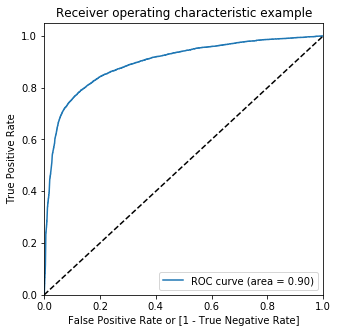

In [37]:
fpr, tpr, thresholds = metrics.roc_curve( y_train,y_train_pred, drop_intermediate = False )
draw_roc(y_train,y_train_pred)

In [38]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_train, y_train_pred.map(lambda x: 1 if x > i else 0))
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.101600  1.000000  0.000000
0.1   0.1  0.778159  0.858130  0.769116
0.2   0.2  0.871111  0.775654  0.881906
0.3   0.3  0.910170  0.709644  0.932848
0.4   0.4  0.925167  0.573655  0.964919
0.5   0.5  0.917474  0.252720  0.992651
0.6   0.6  0.900357  0.028962  0.998903
0.7   0.7  0.898983  0.009556  0.999568
0.8   0.8  0.898729  0.004704  0.999834
0.9   0.9  0.898624  0.002499  0.999967


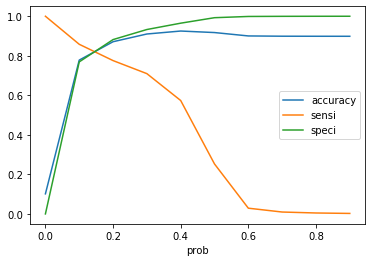

In [39]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [40]:
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.35 else 0)
report = metrics.classification_report(y_train,y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     60147
           1       0.60      0.66      0.63      6802

    accuracy                           0.92     66949
   macro avg       0.78      0.81      0.79     66949
weighted avg       0.92      0.92      0.92     66949



In [41]:
print("Accuracy of Logistic Regression is {0} on train set".format(metrics.accuracy_score(y_train,y_train_pred)))

Accuracy of Logistic Regression is 0.92062614826211 on train set


In [42]:
X_test_rfe=X_test[col]
X_test_sm = sm.add_constant(X_test_rfe)
test['churn_probability'] = model_lm.predict(X_test_sm).map(lambda x: 1 if x > 0.35 else 0)

In [43]:
test[['churn_probability']].to_csv('result_lr.csv')
# We got an accuracy of approx. 90% on Kaggle

#### With PCA

In [44]:
# We will be using PCA because there are multicollinearity present in the data.

In [45]:
from sklearn.decomposition import PCA
pca = PCA(0.9,random_state=42)
pca.fit(X_train)

PCA(n_components=0.9, random_state=42)

In [46]:
pca.components_

array([[ 0.13540189,  0.14873017,  0.14167565, ...,  0.11633921,
         0.11863126,  0.11324993],
       [-0.12052259, -0.13626962, -0.12290759, ...,  0.07308522,
         0.07482912,  0.07279996],
       [-0.05302049, -0.07650683, -0.06729831, ...,  0.00502481,
         0.00487691,  0.00577715],
       ...,
       [-0.00784557, -0.01246934, -0.02973269, ...,  0.01600669,
        -0.02186543, -0.0987674 ],
       [ 0.0347936 , -0.0305767 , -0.05014785, ...,  0.02659169,
         0.00341886, -0.00759921],
       [ 0.00027747, -0.01309445,  0.01114927, ..., -0.07348909,
         0.02829177,  0.05891027]])

In [47]:
pca.explained_variance_ratio_

array([0.11639277, 0.09766404, 0.06252862, 0.04949462, 0.03832752,
       0.02911889, 0.02707087, 0.02478722, 0.02422809, 0.02037504,
       0.01954115, 0.01926351, 0.01864491, 0.01651387, 0.01643858,
       0.01576498, 0.01520608, 0.01475709, 0.01444696, 0.01383223,
       0.01209722, 0.01165023, 0.01140506, 0.01121461, 0.01104549,
       0.01082627, 0.01025736, 0.00956864, 0.00895825, 0.00854406,
       0.00846854, 0.00798112, 0.00690231, 0.00675675, 0.00656886,
       0.00654727, 0.00649986, 0.00633098, 0.00620193, 0.00600447,
       0.00563045, 0.00559658, 0.00553075, 0.00541095, 0.00523094,
       0.00496694, 0.00470511, 0.00454494, 0.00443855, 0.00430158,
       0.00421492, 0.0041754 , 0.00379315, 0.00371867, 0.00354685,
       0.00341726])

In [48]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [49]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_pca,y_train)

y_train_pred = pd.DataFrame(logreg.predict_proba(X_train_pca)).iloc[:,1]
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.35 else 0)

In [50]:
report = metrics.classification_report(y_train,y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     60147
           1       0.61      0.61      0.61      6802

    accuracy                           0.92     66949
   macro avg       0.78      0.78      0.78     66949
weighted avg       0.92      0.92      0.92     66949



In [51]:
print("Accuracy of Logistic Regression is {0} on train set with PCA".format(metrics.accuracy_score(y_train,y_train_pred)))

Accuracy of Logistic Regression is 0.9201033622608255 on train set with PCA


In [52]:
X_test_rfe=X_test[col]
X_test_sm = sm.add_constant(X_test_rfe)
test['churn_probability'] = model_lm.predict(X_test_sm).map(lambda x: 1 if x > 0.35 else 0)

In [53]:
test[['churn_probability']].to_csv('result_lr_pca.csv')
# We got a accuracy of approx. 91% on Kaggle

In [54]:
del test['churn_probability']

## Decision tree Classifier

In [55]:
# we don't have to split the data as it has been splited already. We don't need the scaled data for decision tree.
X_train = train.copy()
X_test = test.copy()

print("Shape of X_train is ", X_train.shape)
print("Shape of y_train is ", y_train.shape)


Shape of X_train is  (66949, 157)
Shape of y_train is  (66949,)


In [56]:
# Running grid search to get better result as it takes more time we have ran it once and shown the result of grid search.
# dt = DecisionTreeClassifier(random_state=42)
# params = {
#     "max_depth": [2,3,5,10,20],
#     "min_samples_leaf": [5,10,20,50,100,500]
# }
# grid_search = GridSearchCV(estimator=dt,
#                            param_grid=params,
#                            cv=4,
#                            n_jobs=-1, verbose=1, scoring="accuracy")

# grid_search.fit(X_train, y_train)

# grid_search.best_params_
# {'max_depth': 10, 'min_samples_leaf': 100}

In [57]:
dtree = DecisionTreeClassifier(random_state = 42,max_depth=10,min_samples_leaf=100)
dtree = dtree.fit(X_train, y_train)
print(X_train.shape)
y_train_pred = dtree.predict(X_train)
report = metrics.classification_report(y_train,y_train_pred)
print(report)

(66949, 157)
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     60147
           1       0.77      0.63      0.70      6802

    accuracy                           0.94     66949
   macro avg       0.87      0.81      0.83     66949
weighted avg       0.94      0.94      0.94     66949



In [58]:
print("Accuracy of Decision tree is {0} on train set".format(metrics.accuracy_score(y_train,y_train_pred)))

Accuracy of Decision tree is 0.9439125304336137 on train set


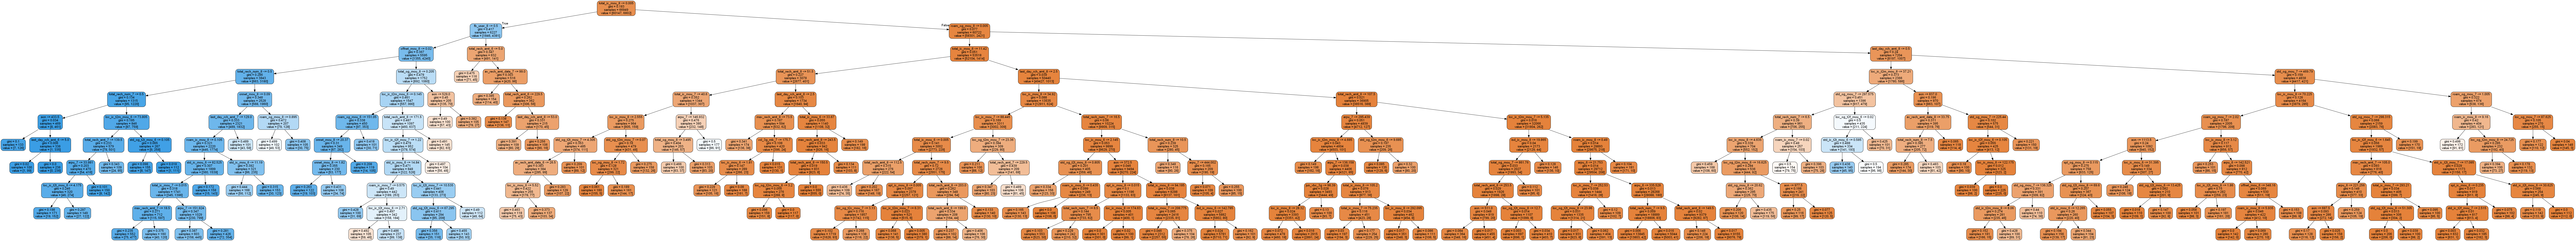

In [59]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [60]:
test['churn_probability'] = dtree.predict(X_test)
test[['churn_probability']].to_csv('Submission.csv')
# We got accuracy of approx. 94.28% in test data.

We can see that as per our EDA last month data is influencing the churning of the customer.

### Random Forest

In [61]:
# Running grid search to get better result as it takes more time we have ran it once and shown the result of grid search.
# rf =RandomForestClassifier(random_state=42)
# params = {
#     "max_depth": [2,3,5,10,20],
#     "min_samples_leaf": [50,100,500],
#     "n_estimators" : [10,100,500],
# }
# grid_search = GridSearchCV(estimator=rf,
#                            param_grid=params,
#                            cv=4,
#                            n_jobs=-1, verbose=1, scoring="accuracy")

# grid_search.fit(X_train, y_train)


# grid_search.best_params_
# {'max_depth': 20, 'min_samples_leaf': 50, 'n_estimators': 10}

In [62]:
model_rf = RandomForestClassifier(n_estimators = 10 ,random_state = 42,max_depth=20,min_samples_leaf=50)
model_rf = model_rf.fit(X_train, y_train)

y_train_pred = model_rf.predict(X_train)
report = metrics.classification_report(y_train,y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     60147
           1       0.79      0.61      0.69      6802

    accuracy                           0.94     66949
   macro avg       0.87      0.80      0.83     66949
weighted avg       0.94      0.94      0.94     66949



In [63]:
print("Accuracy of Random Forest is {0} on train set".format(metrics.accuracy_score(y_train,y_train_pred)))

Accuracy of Random Forest is 0.9434793648896922 on train set


In [64]:
test['churn_probability'] = dtree.predict(X_test)
test[['churn_probability']].to_csv('report_rf.csv')
# We got accuracy of approx. 90.6% in test data.

### XGBoost classifier

In [65]:
# Before start modelling we have to scale the data so that all the columns are given equal importance
col = list(X_train.columns)
scaler = StandardScaler()
X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])

In [66]:
xg_clf = xgb.XGBClassifier(random_state=42)
xg_clf.fit(X_train,y_train)

XGBClassifier(random_state=42)

In [67]:
y_train_pred = xg_clf.predict(X_train)
report = metrics.classification_report(y_train,y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     60147
           1       0.77      0.64      0.70      6802

    accuracy                           0.94     66949
   macro avg       0.86      0.81      0.83     66949
weighted avg       0.94      0.94      0.94     66949



In [68]:
print("Accuracy of XGBoost is {0} on train set".format(metrics.accuracy_score(y_train,y_train_pred)))

Accuracy of XGBoost is 0.9435988588328429 on train set


In [69]:
test['churn_probability'] = xg_clf.predict(X_test)
test[['churn_probability']].to_csv('report_xg1.csv')
# # We got accuracy of approx. 91.06% in test data.

## Conclusion

In [70]:
from prettytable import PrettyTable
from simple_colors import black
x = PrettyTable()

x.field_names = ["Models", "Accuracy(Train)","Accuracy(Test)"]

x.add_row(["Logistic Regression",0.92,0.9020])
x.add_row(["Logistic Regression(PCA)", 0.92,0.91])
x.add_row(["Decision Tree Classifier", 0.944,0.943])
x.add_row(["Random Forest Classifier",0.943,0.908])
x.add_row(["XGBoost Classifier",0.943,0.911])

print(black('Summary of all models are as follows- \n', ['bold']))
print(x)
print(black("Note - All calculated test values are approximated", ['bold']))

Summary of all models are as follows- 

+--------------------------+-----------------+----------------+
|          Models          | Accuracy(Train) | Accuracy(Test) |
+--------------------------+-----------------+----------------+
|   Logistic Regression    |       0.92      |     0.902      |
| Logistic Regression(PCA) |       0.92      |      0.91      |
| Decision Tree Classifier |      0.944      |     0.943      |
| Random Forest Classifier |      0.943      |     0.908      |
|    XGBoost Classifier    |      0.943      |     0.911      |
+--------------------------+-----------------+----------------+
Note - All calculated test values are approximated


We have done Data cleaning, Exploratory data analysis and built different types of Model to get better insights of data and accuracy to predict.

As per above summary table we can say that
- Out of all the models we applied, **Decision Tree Classifier**, gave us the **best** and the **higher** accuracy **0.9428**. For final submission, We take in account the result of **Decision Tree Classifier**.

- The factors that generally affect the churn Probability are the total recharged in the month of last month(`total_rech_amt_8`), Total incoming call came in month of July(`total_ic_mou_7`), total outgoing in the month of August (`total_og_mou_8`), maximum recharge amount in the month of August (`max_rech_amt_8`) and no. of user availing social media services in the month of August(`fb_user_8`).

- We can conclude that if amount spend by customer decreases then chance of churn probability increases. Low spending might be due to customer not interested to continue in the same network. We can start giving them perks so that they start spending and churn probability decreases.